In [13]:
# !pip install yahoo-fin
# !pip install alpha_vantage


In [14]:
# Y2143N0N4SKZ54HW    alpha vantage api

In [17]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='Y2143N0N4SKZ54HW', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

print(data.head())

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2024-08-23 19:59:00  416.815   416.84  416.78   416.780      222.0
2024-08-23 19:58:00  416.830   416.87  416.82   416.870       41.0
2024-08-23 19:57:00  416.880   416.88  416.83   416.880      174.0
2024-08-23 19:56:00  416.830   416.99  416.80   416.877      174.0
2024-08-23 19:55:00  416.860   417.00  416.78   416.830      272.0


In [35]:
import requests
import pandas as pd

# Your Alpha Vantage API key
api_key = "Y2143N0N4SKZ54HW"

# Symbol of the stock (e.g., AAPL for Apple)
symbol = "AAPL"

# API URL for fetching earnings data
url = f"https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}"

# Make the API request
response = requests.get(url)

# Parse the JSON response
data = response.json()

# Convert the earnings data into a pandas DataFrame (quarterly earnings)
earnings_data = pd.DataFrame(data['quarterlyEarnings'])

# Display the earnings data
print(earnings_data)

# Optionally, save the data to a CSV file for further analysis
earnings_data.to_csv('apple_earnings.csv', index=False)


    fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0         2024-06-30   2024-08-01         1.4         1.35     0.05   
1         2024-03-31   2024-05-02        1.53          1.5     0.03   
2         2023-12-31   2024-02-01        2.18          2.1     0.08   
3         2023-09-30   2023-11-02        1.46         1.39     0.07   
4         2023-06-30   2023-08-03        1.26         1.19     0.07   
..               ...          ...         ...          ...      ...   
109       1997-03-31   1997-04-16       -0.05        -0.04    -0.01   
110       1996-12-31   1997-01-15       -0.03        -0.02    -0.01   
111       1996-09-30   1996-10-16      0.0018        -0.01   0.0118   
112       1996-06-30   1996-07-17       -0.02        -0.04     0.02   
113       1996-03-31   1996-04-17       -0.07        -0.05    -0.02   

    surprisePercentage   reportTime  
0               3.7037  post-market  
1                    2  post-market  
2               3.8095  post-mark

In [36]:
earnings_data

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime
0,2024-06-30,2024-08-01,1.4,1.35,0.05,3.7037,post-market
1,2024-03-31,2024-05-02,1.53,1.5,0.03,2,post-market
2,2023-12-31,2024-02-01,2.18,2.1,0.08,3.8095,post-market
3,2023-09-30,2023-11-02,1.46,1.39,0.07,5.036,post-market
4,2023-06-30,2023-08-03,1.26,1.19,0.07,5.8824,post-market
...,...,...,...,...,...,...,...
109,1997-03-31,1997-04-16,-0.05,-0.04,-0.01,-25,pre-market
110,1996-12-31,1997-01-15,-0.03,-0.02,-0.01,-50,pre-market
111,1996-09-30,1996-10-16,0.0018,-0.01,0.0118,118,pre-market
112,1996-06-30,1996-07-17,-0.02,-0.04,0.02,50,pre-market


In [40]:
earnings_data.reportedEPS

,reportedEPS
0,1.4
1,1.53
2,2.18
3,1.46
4,1.26
...,...
109,-0.05
110,-0.03
111,0.0018
112,-0.02


In [44]:
earnings_data.estimatedEPS

,estimatedEPS
0,1.35
1,1.5
2,2.1
3,1.39
4,1.19
...,...
109,-0.04
110,-0.02
111,-0.01
112,-0.04


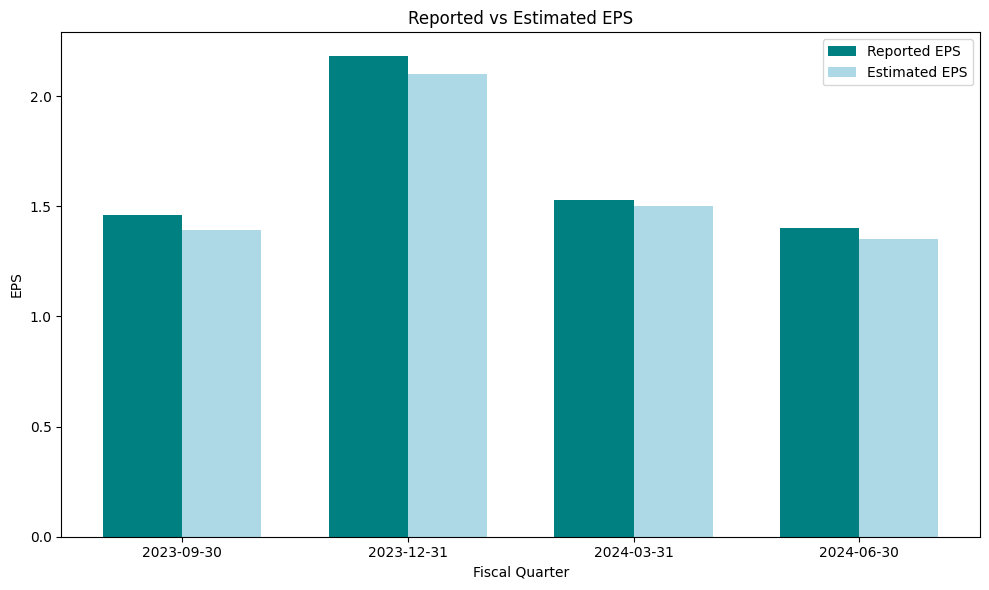

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (similar to what you shared)
data = {
    "fiscalDateEnding": ["2023-09-30", "2023-12-31", "2024-03-31", "2024-06-30"],
    "reportedEPS": [1.46, 2.18, 1.53, 1.4],
    "estimatedEPS": [1.39, 2.1, 1.5, 1.35],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot bars for both reported and estimated EPS
bar_width = 0.35  # Width of the bars
index = range(len(df))  # X-axis positions

# Plot reported EPS
plt.bar(index, df['reportedEPS'], width=bar_width, label='Reported EPS', color='teal')

# Plot estimated EPS
plt.bar([i + bar_width for i in index], df['estimatedEPS'], width=bar_width, label='Estimated EPS', color='lightblue')

# Add labels and title
plt.xlabel('Fiscal Quarter')
plt.ylabel('EPS')
plt.title('Reported vs Estimated EPS')

# Add custom x-axis labels
plt.xticks([i + bar_width / 2 for i in index], df['fiscalDateEnding'])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
